# Lab 3: Data Science in Python

### 1 Data

In this lab you will work with the Boston house price dataset. The dataset is available through SciKit-learn. Import the dataset and print its description. Then create a pandas DataFrame containing all 14 attributes in the dataset.

In [1]:
from sklearn import datasets
import pandas as pd

#load data set
boston = datasets.load_boston()
#creating a dataframe using pandas 
df_boston = pd.DataFrame(boston.data,columns=boston.feature_names)
df_boston['MEDV'] = boston.target
#print description
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### 2 Implementing OLS Regression

Create a class `OLS`. The constructor should take a DataFrame `data` and a label name `response` for the response variable. Using NumPy, an Ordinary Least Squares Regression should be fitted on the data (including intercept). This should be implemented manually, using only simple matrix operations (inverse, transposition and multiplication) but you are recommended to check your results against `scipy.linalg.lstsq` (also available as `numpy.linalg.lstsq`). The class should implement the instance functions `get_yhat` (return an ndarray representing $\hat{y}$), `get_residuals` (return an ndarray representing $y-\hat{y}$), `get_rmse` (return the root mean sqared) and `get_beta` (return the fitted $\beta$ vector as an ndarray).

In [2]:


import numpy as np
from numpy.linalg import inv 
import math
import matplotlib.pyplot as plt
from itertools import cycle

class OLS:
    
    def __init__(self, dataFrame, response):
        
        self.response = response
        self.dataFrame = dataFrame
        
        self.X = dataFrame.loc[:, dataFrame.columns != response]
        self.Y = dataFrame.loc[:,response]
       
        
        
      
        if 'intercept' not in self.X:
            self.columnNames = np.insert(self.X.columns, 0, 'INT')
            intercept =  np.ones(shape=self.X.shape[0])[..., None]
            self.X.insert(0, "intercept", intercept)
            
      
        
          
        x = self.X.as_matrix()
        #calculate cofficient
        self.coeffs = inv(x.transpose().dot(x)).dot(x.transpose()).dot(self.Y)
        #y_hat calculate
        self.yhat = self.X.dot(self.coeffs)
        
        
    def get_beta(self):
        results = pd.DataFrame({'coefficients':self.coeffs}, index=self.X.columns)
        return results.round(2)
    
    def get_yhat(self):
        return self.yhat
    
    def get_residual(self):
        self.residual = self.Y - self.yhat
        return self.residual
    
    def get_rmse(self):
        self.mse = np.mean((self.Y - self.yhat)**2)
        return self.mse
    
    def cross_validate(self,n):
    
        df =  self.dataFrame   
        response = self.response    
        data_len = df.shape[0]
        fold_size = math.floor(data_len/n)
    
        if 'intercept' in df:
            df.drop('intercept', axis=1, inplace=True)
        else:
            intercept =  np.ones(shape=df.shape[0])[..., None]
            df.insert(0, "intercept", intercept)
        
        l = np.array(range(0,data_len,fold_size))
        
        #result dataFrame of Yhat
        y_hat = pd.DataFrame()
        y = pd.DataFrame()
        Ytest = []
        for i in range(0,n):
            
            start_index = l[i]
            end_index = l[i+1]+1
            
            indces = list(range(start_index,end_index,1))
            
            test = df.iloc[indces,:]
            train = df.drop(df.index[indces])
            
            
            #x train  and Y train
            Xtest = test.loc[:, test.columns != response]
            Ytest = test.loc[:,response]
            
            Xtrain = train.loc[:, train.columns != response]
            Ytrain = train.loc[:,response]
            
            
            column_name = "y_{0}".format(i)
            y.insert(i , column_name, np.array(Ytest))
            
            column_name = "fold_{0}".format(i)
            rr = OLS.myLin(Xtrain,Ytrain,Xtest)
            y_hat.insert(i, column_name, np.array(rr))
            

        OLS.myPlot(y,y_hat,n)
        return None
    
    
    @classmethod
    def myLin(cls,X,Y,Xtest):
        beta_coeffs = inv(X.transpose().dot(X)).dot(X.transpose()).dot(Y)
        #y_hat calculate
        yhat = Xtest.dot(beta_coeffs)
        return yhat

    @classmethod
    def myPlot(self,y,y_hat,n):
  
        for i in range(0,n):
            plt.plot(y.iloc[:,i],y_hat.iloc[:,i],'.')
            
        plt.title("K-{0} fold Corss Validation".format(n))
        plt.legend()  
        plt.xlabel("Actual Values Y")
        plt.ylabel("Fitted Values Y_hat")
        plt.show()  

#test code

ols_obj = OLS(df_boston,"MEDV")
ols_obj.get_beta()


,coefficients
intercept,36.49
CRIM,-0.11
ZN,0.05
INDUS,0.02
CHAS,2.69
NOX,-17.80
RM,3.80
AGE,0.00
DIS,-1.48
RAD,0.31


### 3 Cross Validation and plotting

Implement a function `cross_validate` in the OLS class which should take one parameter, `n`, and perform n-fold cross-validation on the data supplied at creation of an OLS object.

Use `matplotlib` and the results from above to plot $y$ against in-sample $\hat{y}$ and out-of-sample cross-validated $\hat{y}$ in a scatter plot. Plot in-sample and out-out-sample in different colors. The plot should have suitable labels on both axes and a legend explaining which color represents which $\hat{y}$

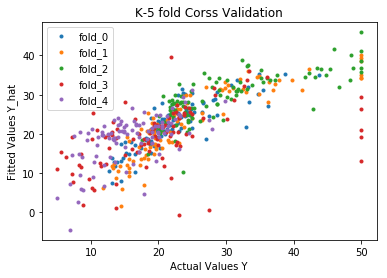

In [3]:
#implmented in above class
ols_obj = OLS(df_boston,"MEDV")
ols_obj.cross_validate(5) #get beta cofficients

### 4 SciKit-learn

Explore SciKit-learn and select 3 regression algorithms you would like to try. Also choose some sort of shrinking, regularization or feature selection unless such is inherent in the model (as in for example LASSO or kernel SVM). Play around with any hyperparameters or, better, apply a hyper-parameter tuning algorithm (there are classes that do this in SciKit-learn). Apply the selected algorithms on the Boston data set, using cross validation to generate out-of-sample predictions (also implemented in SciKit-learn), and plot the results.

1.0


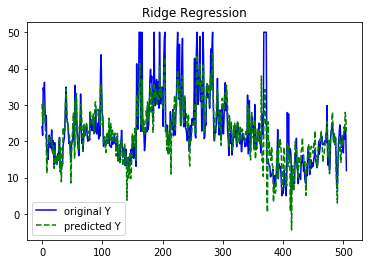

In [4]:
from sklearn import linear_model
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import random
import matplotlib.pyplot as plt

boston_X = boston.data
boston_Y = boston.target

# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = linear_model.Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(boston_X, boston_Y)
print(grid.best_estimator_.alpha)

reg = linear_model.Ridge(alpha=grid.best_estimator_.alpha)
fitting = reg.fit(boston_X,boston_Y)
predicted_Y = fitting.predict(boston_X)

d = {'y' : pd.Series(boston_Y),'yHat' : pd.Series(predicted_Y)}
fitted_df = pd.DataFrame(d)

plt.plot(fitted_df.iloc[:,0],'b-',label='original Y')
plt.plot(fitted_df.iloc[:,1],'g--',label='predicted Y')
plt.title("Ridge Regression")
plt.legend()
plt.show()



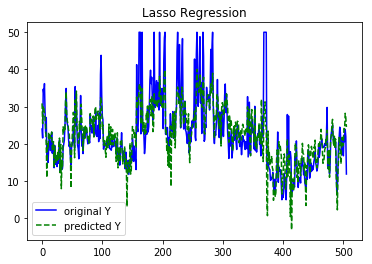

In [5]:
### Lasso Regression
lasso = linear_model.LassoCV(n_alphas=100,cv=20)
fitting = lasso.fit(boston_X,boston_Y)
predicted_Y = fitting.predict(boston_X)

lasso_d = {'y' : pd.Series(boston_Y),'yHat' : pd.Series(predicted_Y)}
lasso_df = pd.DataFrame(lasso_d)

plt.plot(lasso_df.iloc[:,0],'b-',label='original Y')
plt.plot(lasso_df.iloc[:,1],'g--',label='predicted Y')
plt.title("Lasso Regression")
plt.legend()
plt.show()



1.0


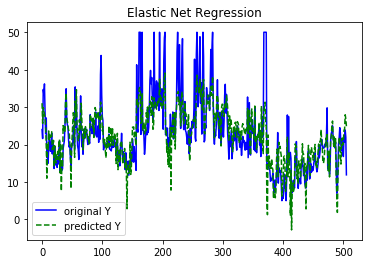

In [6]:
alphas = np.array([1.5,1,0.1,0.01,0.001,0.0001])

# create and fit a elastic net regression model, testing each alpha
model = linear_model.ElasticNet()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(boston_X, boston_Y)
print(grid.best_estimator_.alpha)

elastic = linear_model.ElasticNet(alpha=grid.best_estimator_.alpha)
fitting = elastic.fit(boston_X,boston_Y)
predicted_Y = fitting.predict(boston_X)

elastic_d = {'y' : pd.Series(boston_Y),'yHat' : pd.Series(predicted_Y)}
elastic_df = pd.DataFrame(elastic_d)

plt.plot(elastic_df.iloc[:,0],'b-',label='original Y')
plt.plot(elastic_df.iloc[:,1],'g--',label='predicted Y')
plt.title("Elastic Net Regression")
plt.legend()
plt.show()



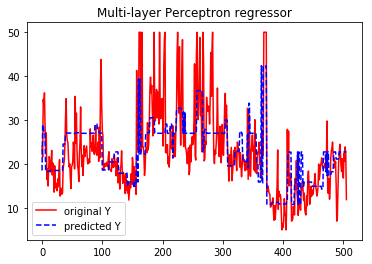

Multi-layer Perceptron regressor Alpha best Value = 0.001 best tuning factor


In [7]:
#### Multi-layer Perceptron regressor

#X as response
X = df_boston.iloc[:, 4]
XX = df_boston.iloc[:, 5]
X = np.array([XX, X]).T

#target
Y = df_boston.loc[:,"MEDV"]

#spliting a data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#tuning a params on different Alpha's
#alphas = np.array([random.uniform(0,1) for i in range(1,15)])
alphas = np.array([1.5,1,0.1,0.01,0.001,0.0001])

nn = MLPRegressor()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train, y_train)
best_alpha = grid.best_estimator_.alpha


#fitting a model on best Aplha
nn = MLPRegressor(activation='logistic', alpha=best_alpha, batch_size='auto', \
                  beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08, \
                  hidden_layer_sizes=(20,), learning_rate='constant', \
                  learning_rate_init=0.001, max_iter=200, momentum=0.9, \
                  nesterovs_momentum=True, power_t=0.5, random_state=None, \
                  shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1, \
                  verbose=False, warm_start=False)


n = nn.fit(X_train, y_train)

#MSe for test and train
train_mse = mean_squared_error(y_train, nn.predict(X_train))
test_mse = mean_squared_error(y_test, nn.predict(X_test))

#prediction
Y_HAT = nn.predict(X)

#plotting
d = {'y' : pd.Series(Y),'yHat' : pd.Series(Y_HAT)}
MLE_df = pd.DataFrame(d)

plt.plot(MLE_df.iloc[:,0],'r-',label='original Y')
plt.plot(MLE_df.iloc[:,1],'b--',label='predicted Y')
plt.legend()
plt.title("Multi-layer Perceptron regressor")
plt.show()
print("Multi-layer Perceptron regressor Alpha best Value = {0} best tuning factor".format(best_alpha))